In [7]:
import statistics as st
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [8]:
def roll_die():
    return random.randint(1,6)


class Player:
    """
    Responsibilities:
    Keep track of score and number of rolls
    Determine if player should roll again based on current state
    Run through a complete turn
    - 
    """
    
    def __init__(self):
        self.points = 0
        self.reset()
    
    def reset(self):
        self.points = 0
        self.rolls = 0
    
    def should_roll_again(self):
        """
        Returns True if the Player should roll again, False otherwise
        This method should probably be overridden with subclasses to do more complex stuff!
        """
        return False
    
    def play_turn(self):
        self.reset()
        
        while True:
            roll = roll_die()
            self.rolls += 1
            if roll == 1:
                self.points += 0
                return 0
            else:
                self.points += roll
            if not self.should_roll_again():
                break
        
        return self.points

In [9]:
class PigSolitaireGame:
    def __init__(self, player):
        self.player = player
    
    def play_game(self):
        total_points = 0
        for _ in range(7):
            total_points += self.player.play_turn()
        
        return total_points

In [10]:
class BasePlayer(Player):
    # You only need to roll once
    def should_roll_again(self):
        if self.rolls < 2:
            return True
        else:
            return False

In [11]:
class AggressivePlayer(Player):
    #roll three times every round
    def should_roll_again(self):
        if self.rolls < 4:
            return True
        else:
            return False

In [12]:
class CautiousPlayer(Player):
    #roll two times every round
    def should_roll_again(self):
        if self.rolls < 3:
            return True
        else:
            return False

In [13]:
class NoHoldsBarredPlayer(Player):
    #roll twenty times per round
    def should_roll_again(self):
        if self.rolls < 21:
            return True
        else:
            return False

In [14]:
hanz = PigSolitaireGame(BasePlayer())
franz = PigSolitaireGame(AggressivePlayer())
yortuk = PigSolitaireGame(CautiousPlayer())
georg = PigSolitaireGame(NoHoldsBarredPlayer())

base_data = []
aggressive_data = []
cautious_data = []
no_holds_data = []

for x in range(10000):
    base_data.append(hanz.play_game())
    aggressive_data.append(franz.play_game())
    cautious_data.append(yortuk.play_game())
    no_holds_data.append(georg.play_game())

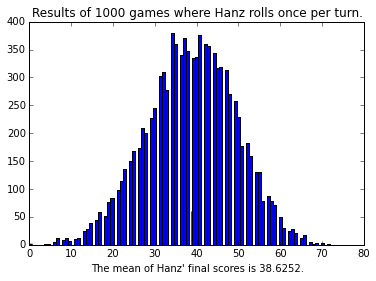

[38, 20, 46, 37, 41, 51, 37, 30, 55, 25, 55, 45, 65, 34, 37, 39, 45, 61, 29, 33, 50, 48, 35, 50, 34, 42, 46, 47, 32, 42, 41, 35, 37, 63, 48, 39, 37, 34, 20, 48, 17, 44, 43, 9, 62, 51, 33, 64, 32, 41, 59, 49, 39, 29, 31, 47, 42, 35, 26, 36, 23, 19, 33, 37, 34, 42, 44, 41, 32, 46, 43, 28, 26, 40, 45, 47, 33, 34, 47, 34, 45, 52, 36, 36, 48, 36, 39, 36, 44, 22, 44, 44, 47, 50, 39, 30, 45, 29, 24, 42, 28, 27, 40, 18, 41, 16, 42, 53, 47, 25, 34, 36, 28, 36, 34, 26, 44, 47, 48, 39, 24, 20, 52, 27, 54, 35, 49, 35, 35, 8, 36, 45, 41, 23, 32, 34, 28, 21, 36, 41, 39, 59, 45, 51, 17, 36, 24, 43, 55, 62, 20, 55, 25, 39, 34, 41, 55, 26, 15, 35, 31, 28, 35, 40, 52, 26, 41, 52, 35, 46, 42, 27, 55, 54, 42, 50, 39, 45, 40, 53, 36, 42, 44, 39, 55, 43, 41, 26, 53, 63, 15, 33, 34, 41, 37, 46, 27, 46, 35, 35, 49, 32, 63, 48, 47, 35, 51, 34, 33, 41, 34, 27, 38, 8, 27, 29, 44, 34, 42, 33, 17, 46, 50, 49, 43, 39, 35, 57, 50, 34, 38, 34, 52, 55, 42, 58, 49, 35, 31, 34, 39, 45, 35, 36, 22, 35, 58, 31, 37, 21, 27

In [15]:
plt.hist(base_data, bins = 100)
plt.title("Results of 1000 games where Hanz rolls once per turn.")
plt.xlabel("The mean of Hanz' final scores is {}.".format(st.mean(base_data)))
plt.vlines(st.mean(base_data), ymin=0, ymax = 60, color='red', linestyle='solid')
plt.show()
print(base_data)

In [16]:
print("The minimum score was {} and the maximum score was {}.".format(min(base_data), max(base_data)))

The minimum score was 0 and the maximum score was 72.


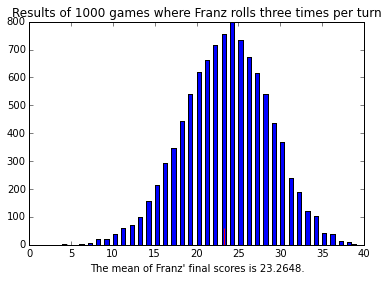

In [17]:
plt.hist(aggressive_data, bins = 70)
plt.title("Results of 1000 games where Franz rolls three times per turn")
plt.xlabel("The mean of Franz' final scores is {}.".format(st.mean(aggressive_data)))
plt.vlines(st.mean(aggressive_data), ymin = 0, ymax = 60, color ='red', linestyle='solid')
plt.show()

In [18]:
print("The minimum score was {} and the maximum score was {}.".format(min(aggressive_data), max(aggressive_data)))

The minimum score was 4 and the maximum score was 39.


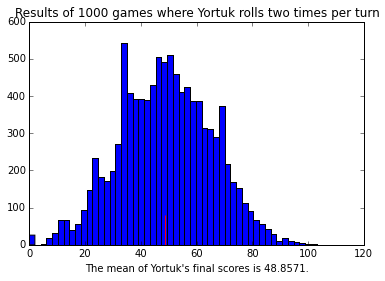

In [19]:
plt.hist(cautious_data, bins=50)
plt.title("Results of 1000 games where Yortuk rolls two times per turn")
plt.xlabel("The mean of Yortuk's final scores is {}.".format(st.mean(cautious_data)))
plt.vlines(st.mean(cautious_data), ymin = 0, ymax = 80, color ='red', linestyle='solid')
plt.show()

In [20]:
print("The minimum score was {} and the maximum score was {}.".format(min(cautious_data), max(cautious_data)))

The minimum score was 0 and the maximum score was 103.


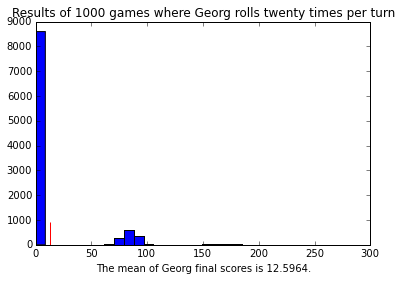

In [21]:
plt.hist(no_holds_data, bins=30)
plt.title("Results of 1000 games where Georg rolls twenty times per turn")
plt.xlabel("The mean of Georg final scores is {}.".format(st.mean(no_holds_data)))
plt.vlines(st.mean(no_holds_data), ymin = 0, ymax = 900, color ='red', linestyle='solid')
plt.show()

In [22]:
print("The minimum score was {} and the maximum score was {}.".format(min(no_holds_data), max(no_holds_data)))

The minimum score was 0 and the maximum score was 264.


# Conclusion
When rolling too many times, the score is much lower, but of the players rolling 2-3 times, the mean scores were higher.